<a href="https://colab.research.google.com/github/krishnaaxo/Bank-Customers-Segmentation-Analysis/blob/main/Bank_Customers_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix

In [2]:
creditcard_df = pd.read_csv('yes.csv')

In [3]:
creditcard_df


CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0     C10001    40.900749  ...          0.000000      12
1     C10002  3202.467416  ...          0.222222      12
2     C10003  2495.148862  ...          0.000000      12
3     C10004  1666.670542  ...          0.000000      12
4     C10005   817.714335  ...          0.000000      12
...      ...          ...  ...               ...     ...
8945  C19186    28.493517  ...          0.500000       6
8946  C19187    19.183215  ...          0.000000       6
8947  C19188    23.398673  ...          0.250000       6
8948  C19189    13.457564  ...          0.250000       6
8949  C19190   372.708075  ...          0.000000       6

[8950 rows x 18 columns]

In [8]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
creditcard_df.describe()

BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT       TENURE
count   8950.000000        8950.000000  ...       8950.000000  8950.000000
mean    1564.474828           0.877271  ...          0.153715    11.517318
std     2081.531879           0.236904  ...          0.292499     1.338331
min        0.000000           0.000000  ...          0.000000     6.000000
25%      128.281915           0.888889  ...          0.000000    12.000000
50%      873.385231           1.000000  ...          0.000000    12.000000
75%     2054.140036           1.000000  ...          0.142857    12.000000
max    19043.138560           1.000000  ...          1.000000    12.000000

[8 rows x 17 columns]

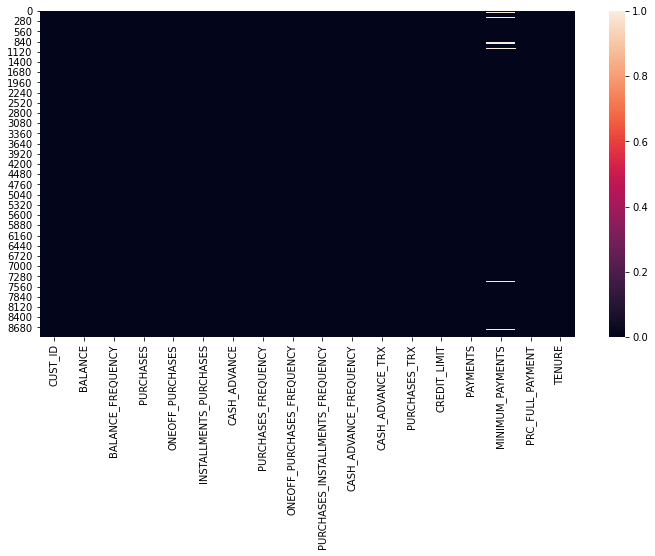

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(creditcard_df.isnull())
plt.show()


In [12]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [14]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [15]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

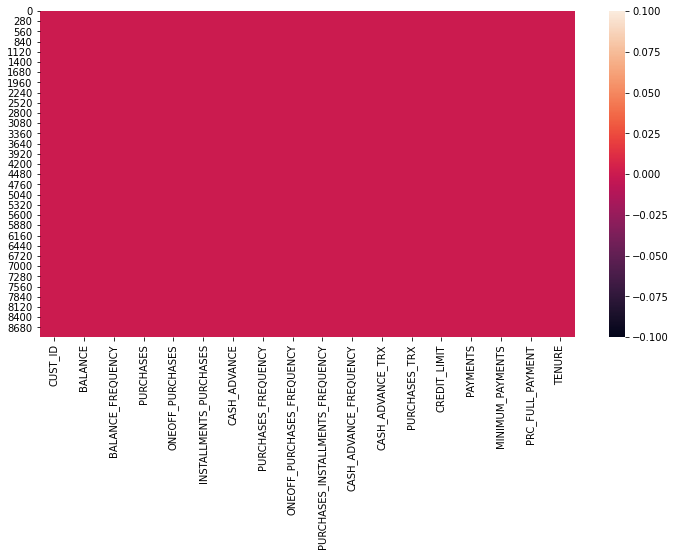

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(creditcard_df.isnull())
plt.show()

In [17]:
creditcard_df.head()

CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0  C10001    40.900749  ...          0.000000      12
1  C10002  3202.467416  ...          0.222222      12
2  C10003  2495.148862  ...          0.000000      12
3  C10004  1666.670542  ...          0.000000      12
4  C10005   817.714335  ...          0.000000      12

[5 rows x 18 columns]

In [18]:
n = len(creditcard_df.columns)
n

18

In [20]:
creditcard_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [23]:
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [24]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

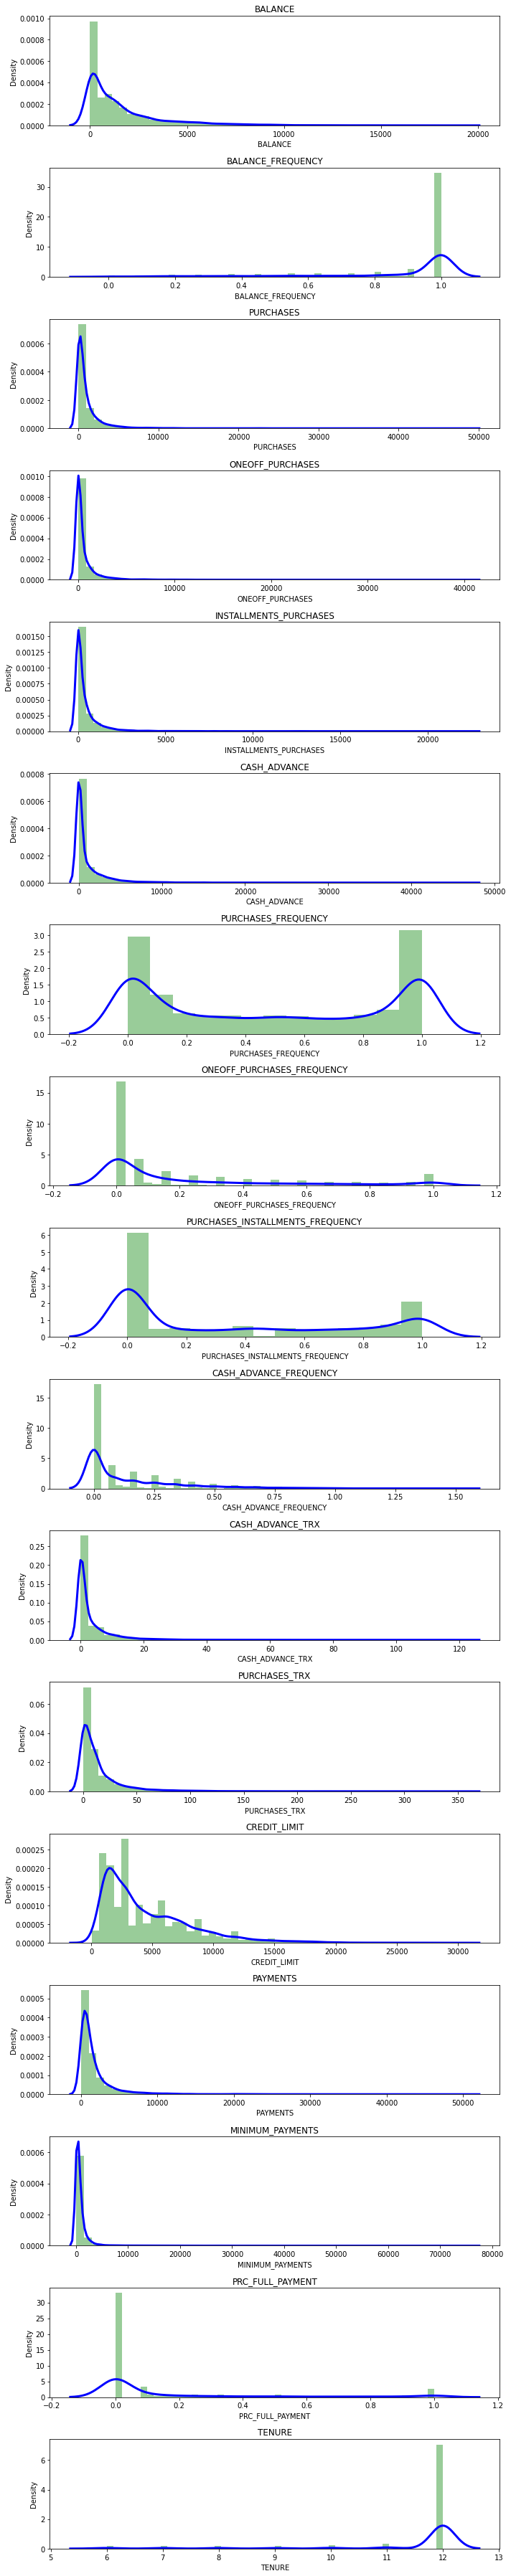

In [25]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

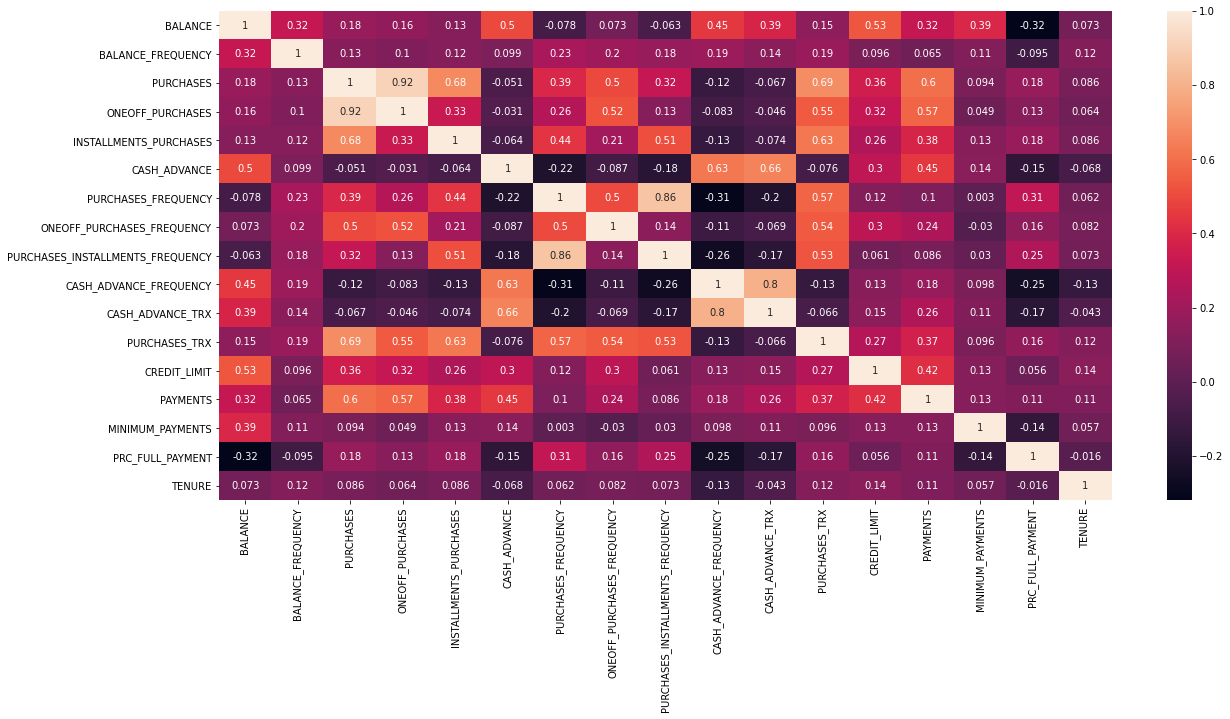

In [45]:
corr = creditcard_df.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

<Figure size 432x288 with 0 Axes>

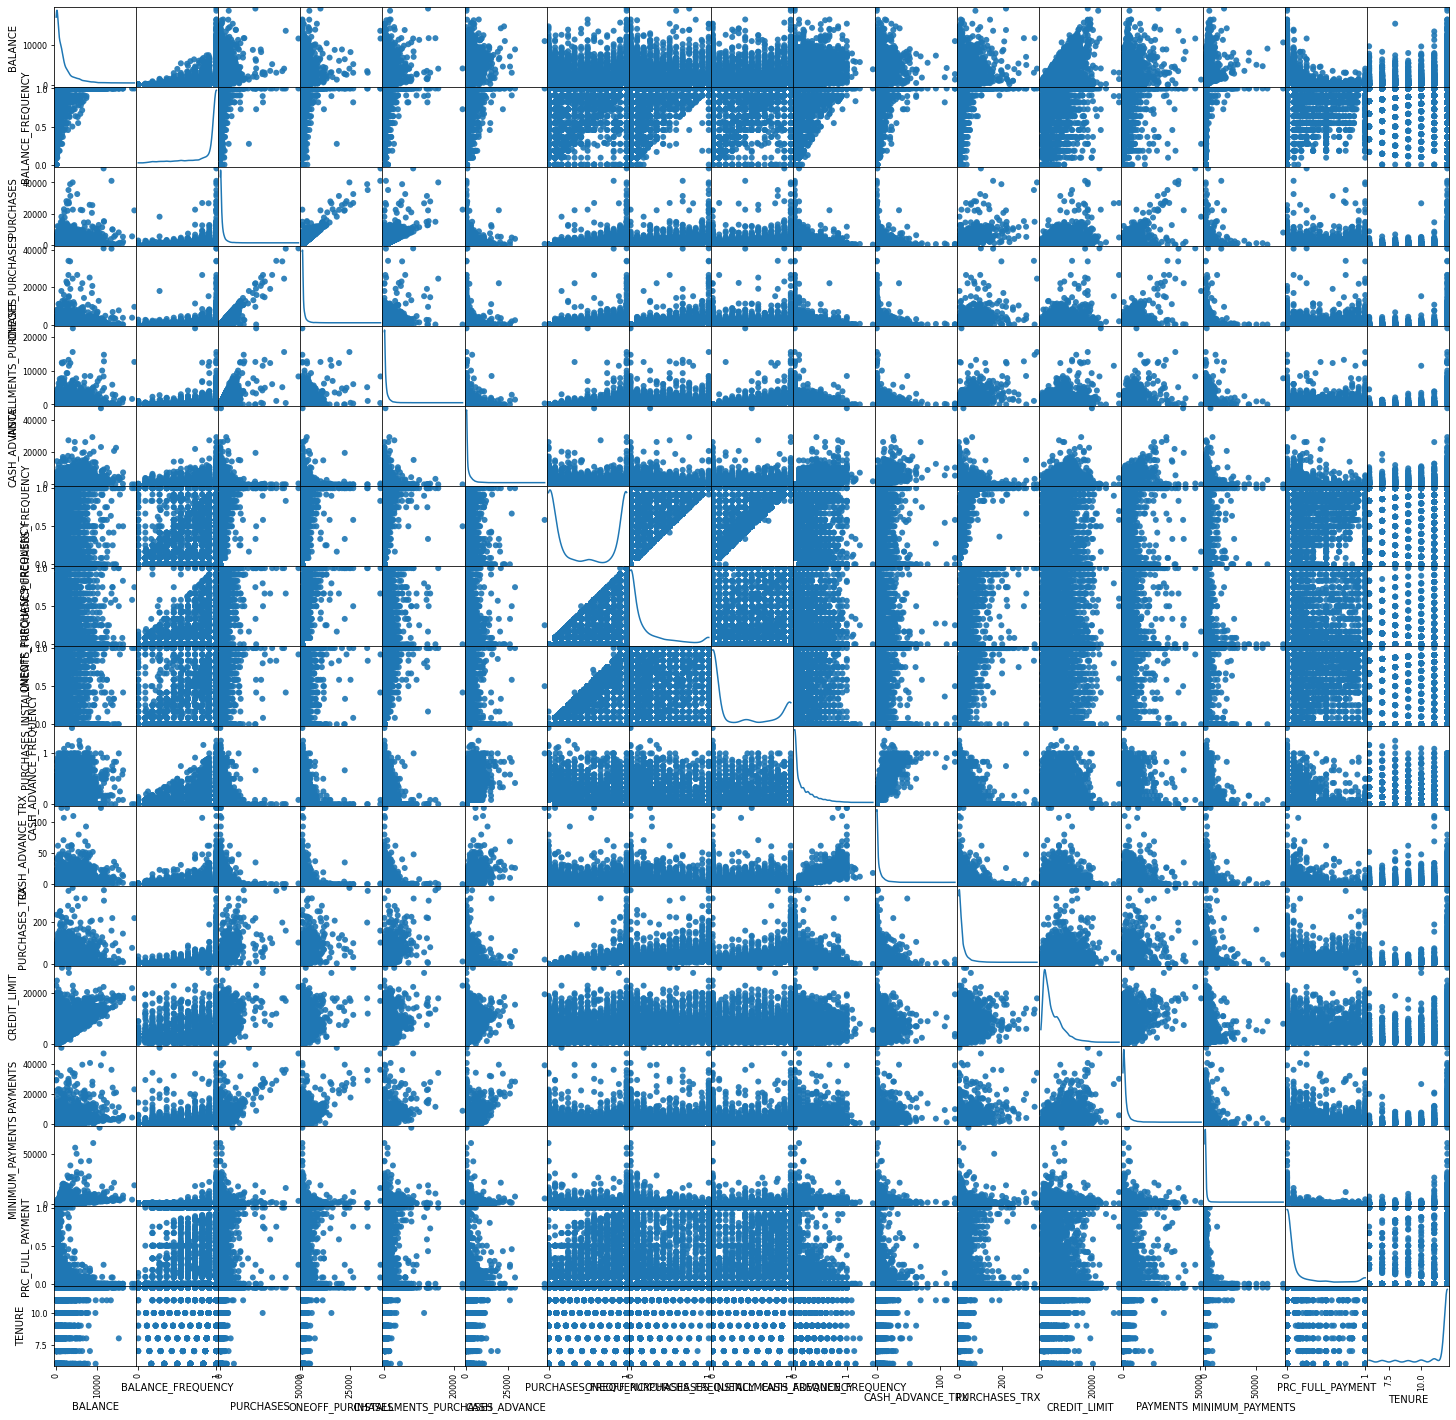

In [31]:
fig = plt.figure()
scatter_matrix(creditcard_df,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");

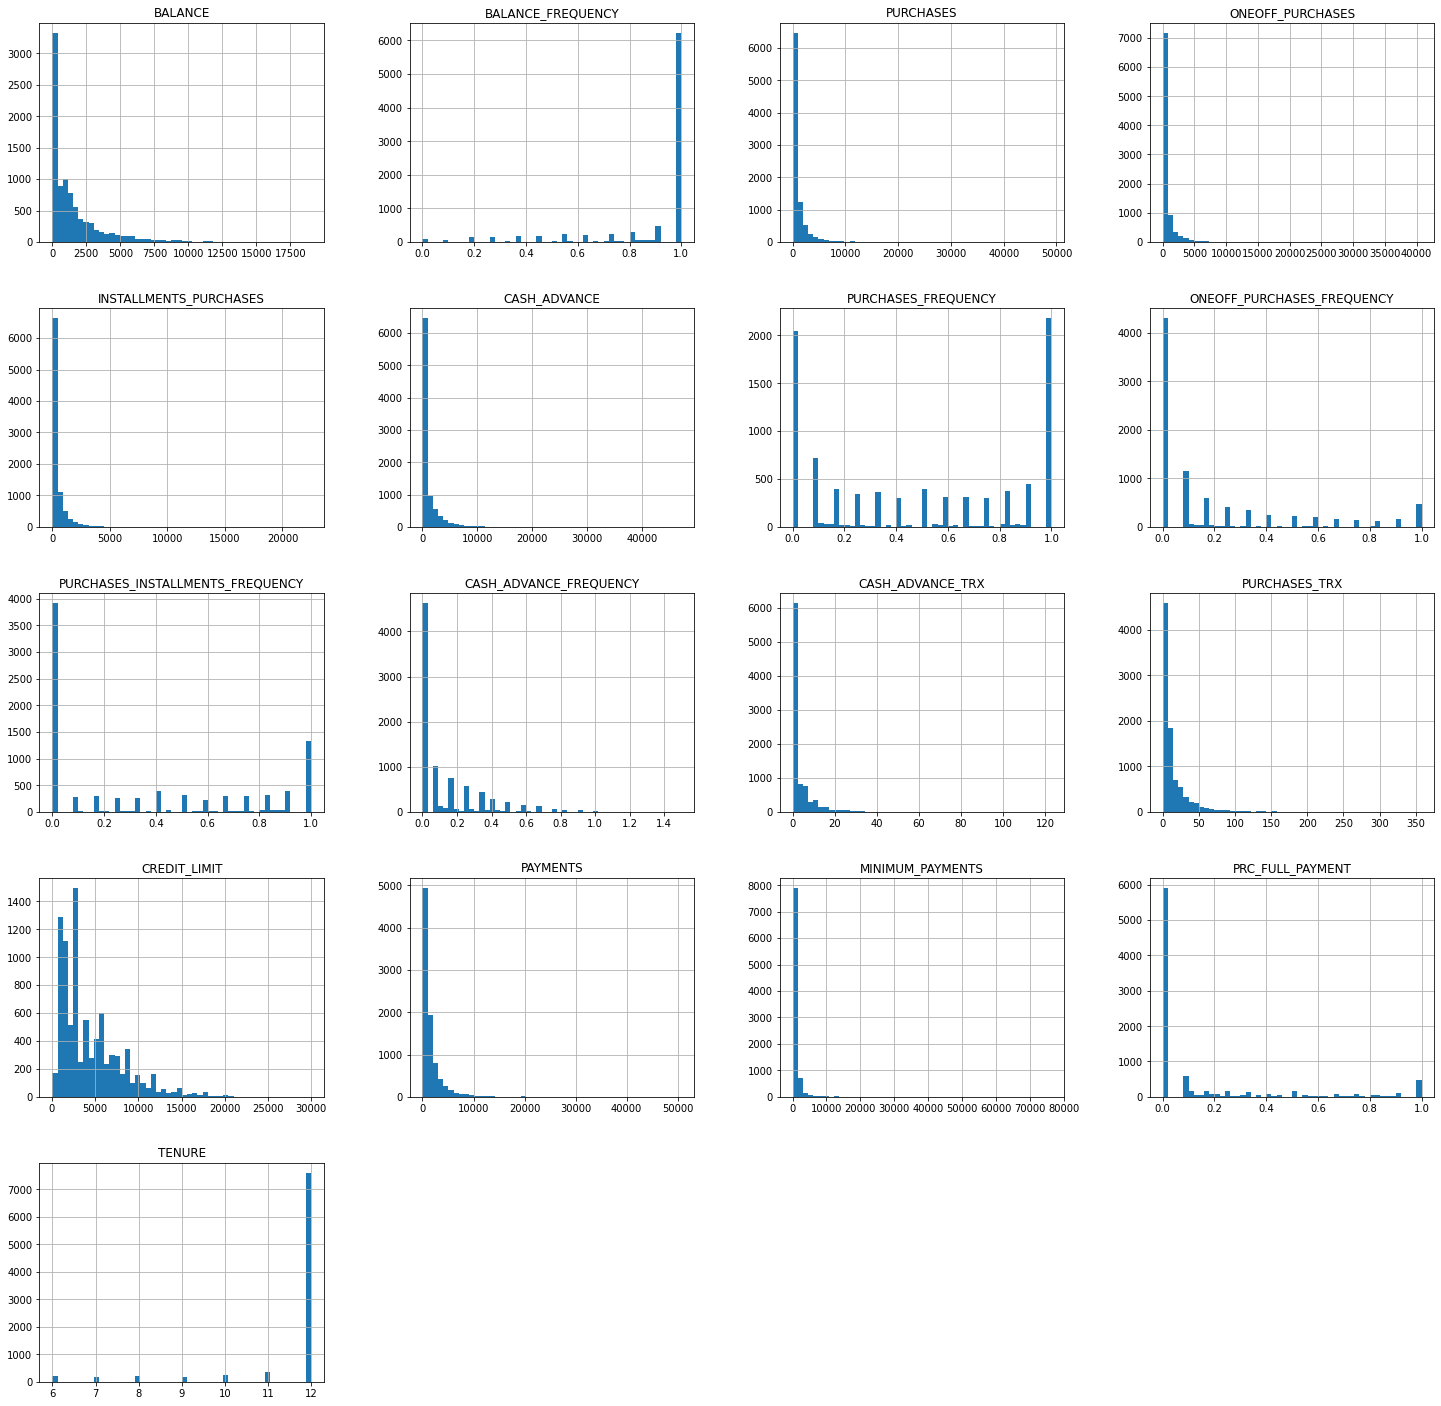

In [32]:
creditcard_df.hist(figsize=(25,25),bins=50);

In [33]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [34]:
creditcard_df_scaled.shape

(8950, 17)

In [35]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

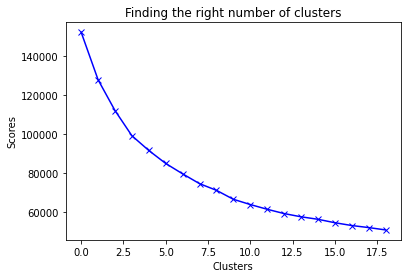

In [36]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

In [37]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [38]:
kmeans.cluster_centers_.shape

(8, 17)

In [39]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers     

BALANCE BALANCE_FREQUENCY  ... PRC_FULL_PAYMENT    TENURE
0 -0.364008          0.333258  ...         0.311254  0.256619
1  1.682015          0.391571  ...        -0.390322  0.069031
2 -0.126163          0.400367  ...         0.443789  0.268189
3  1.054413          0.465451  ...         0.245206  0.337720
4  1.845310          0.340595  ...         1.222264  0.298409
5  0.014361          0.403934  ...        -0.455466  0.273393
6 -0.336228         -0.347383  ...         0.014243 -3.202809
7 -0.701258         -2.140285  ...         0.283165  0.198977

[8 rows x 17 columns]

In [40]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers


BALANCE BALANCE_FREQUENCY  ... PRC_FULL_PAYMENT     TENURE
0   806.823043          0.956217  ...         0.244751  11.860741
1  5065.446437          0.970030  ...         0.039552  11.609700
2  1301.877537          0.972114  ...         0.283515  11.876224
3  3759.147165          0.987532  ...         0.225433  11.969274
4  5405.330935          0.957955  ...         0.511206  11.916667
5  1594.365208          0.972959  ...         0.020499  11.883188
6   864.645308          0.794979  ...         0.157880   7.231140
7   104.865352          0.370257  ...         0.236535  11.783601

[8 rows x 17 columns]

In [41]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([0, 1, 5, ..., 4, 4, 4], dtype=int32)

In [42]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ...  PRC_FULL_PAYMENT  TENURE  cluster
0    40.900749           0.818182      95.40  ...          0.000000      12        5
1  3202.467416           0.909091       0.00  ...          0.222222      12        1
2  2495.148862           1.000000     773.17  ...          0.000000      12        2
3  1666.670542           0.636364    1499.00  ...          0.000000      12        5
4   817.714335           1.000000      16.00  ...          0.000000      12        5

[5 rows x 18 columns]

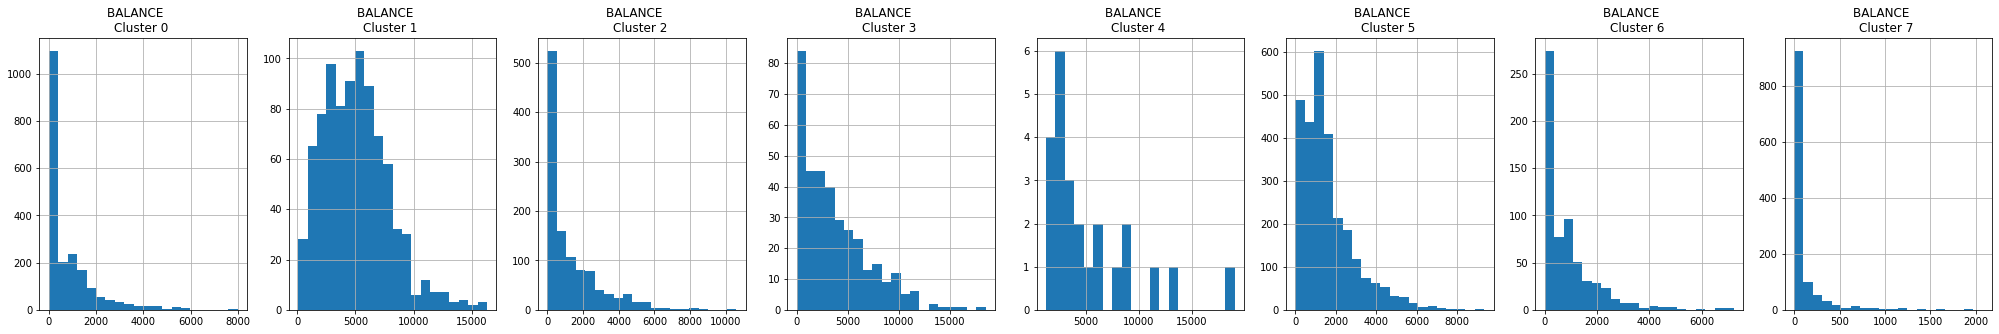

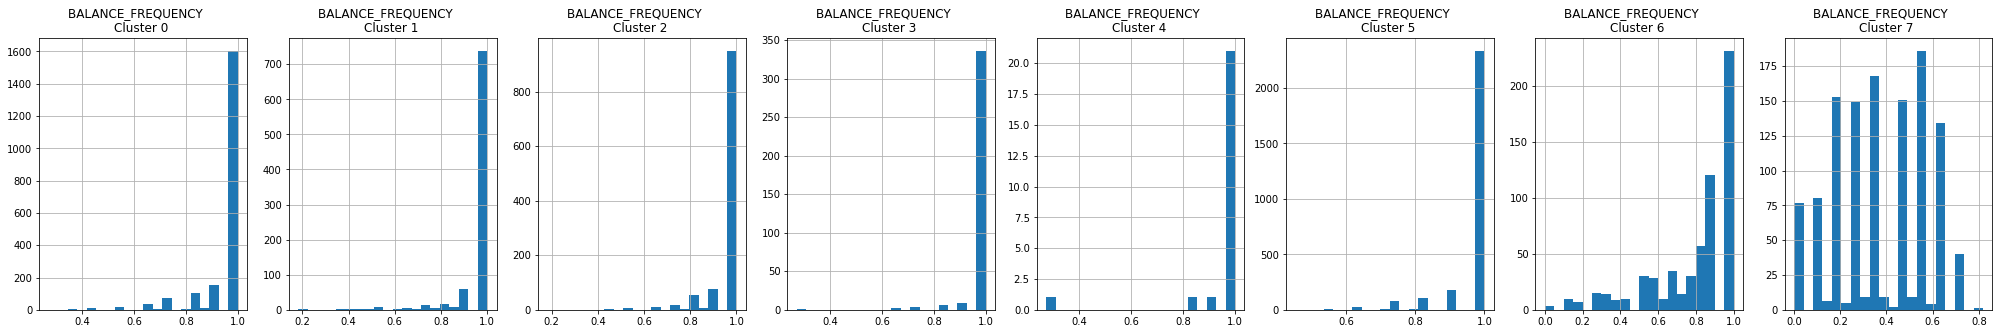

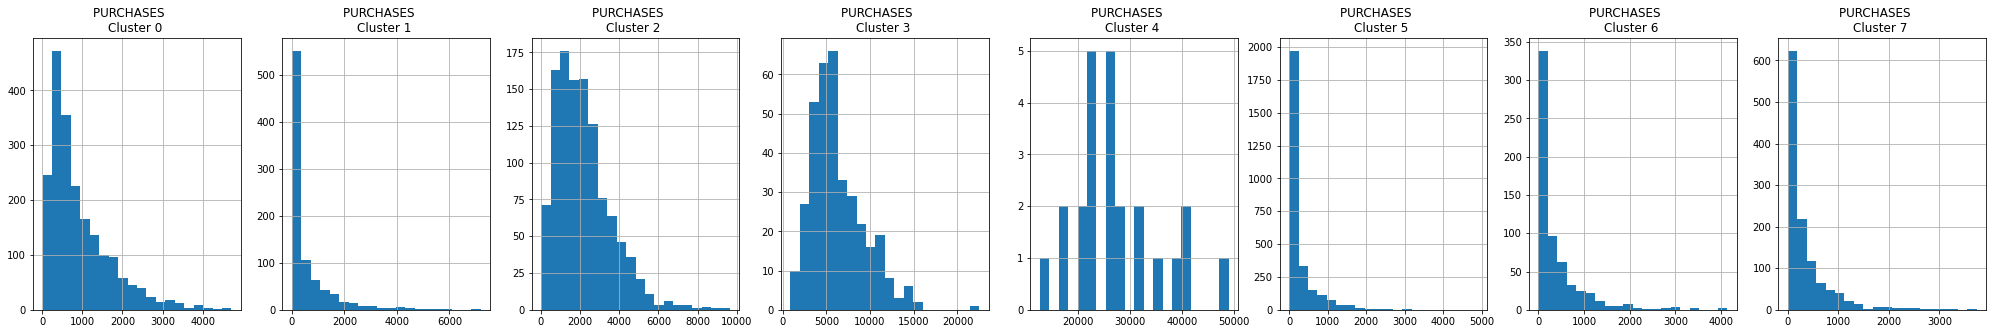

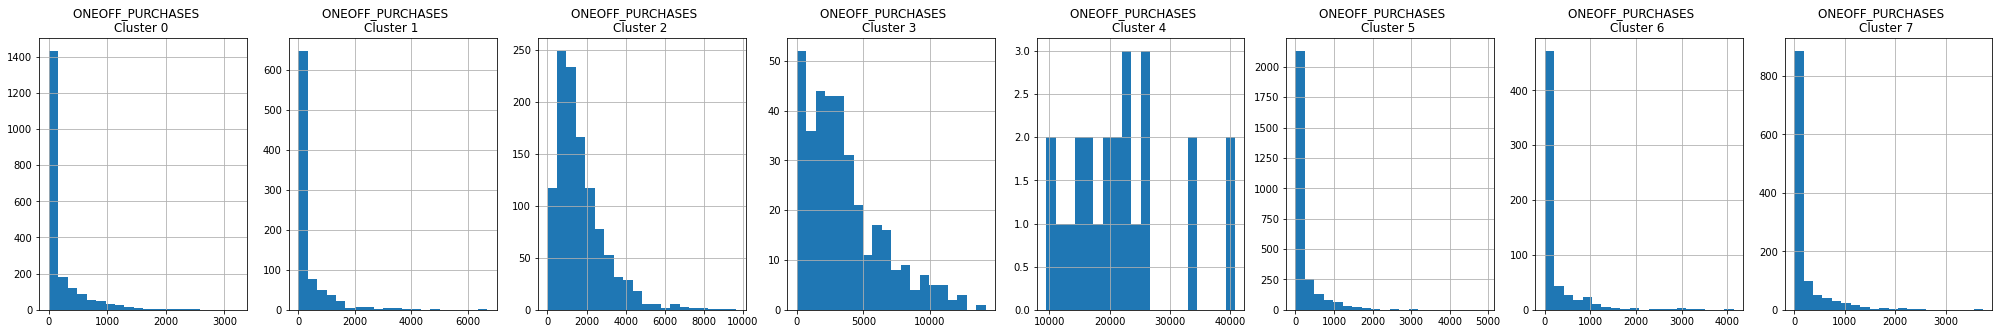

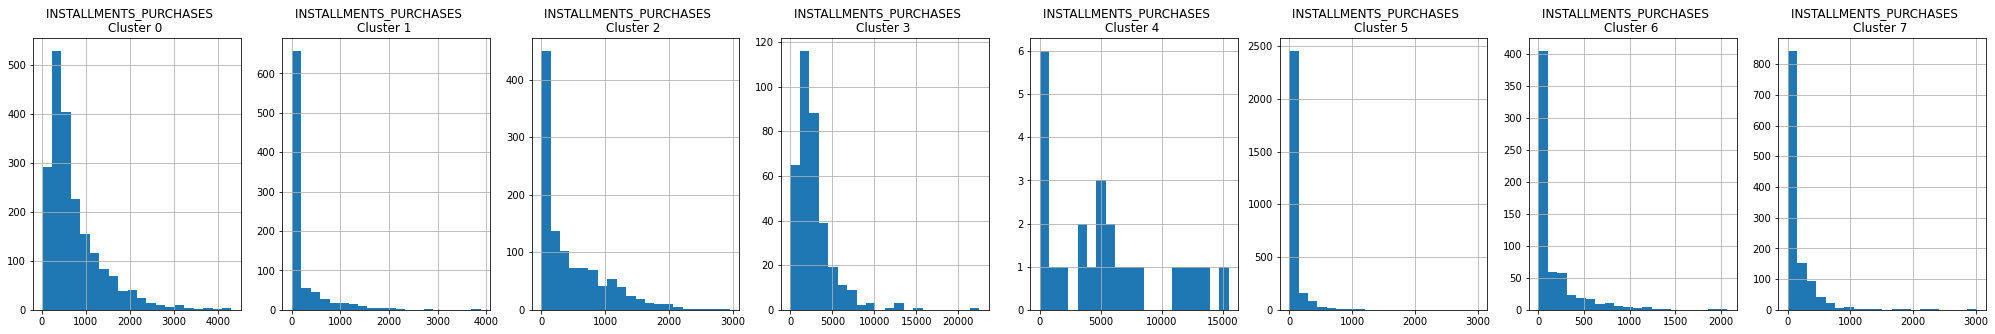

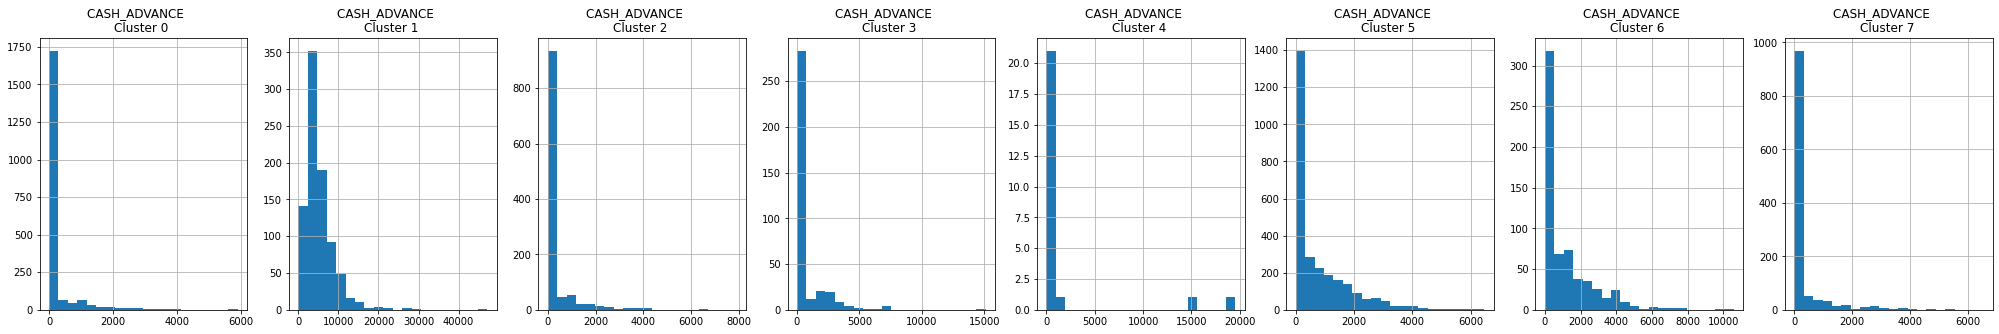

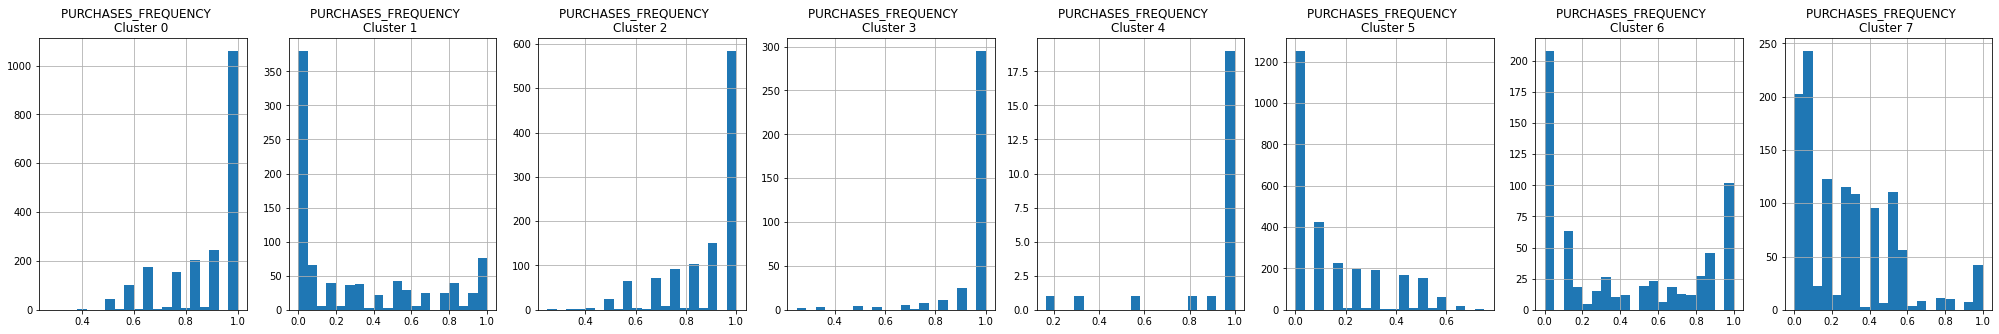

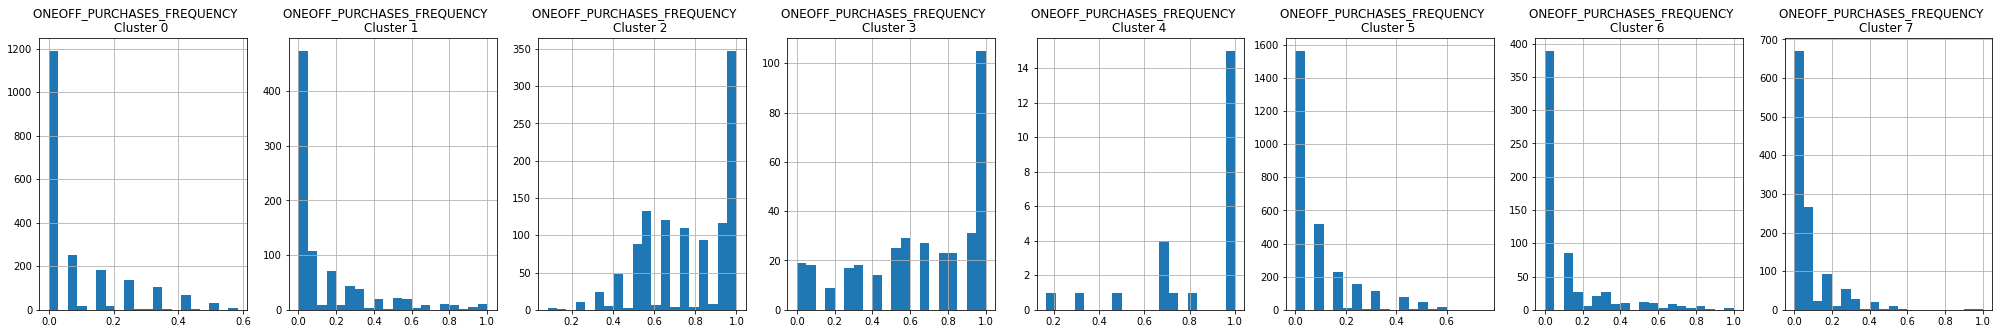

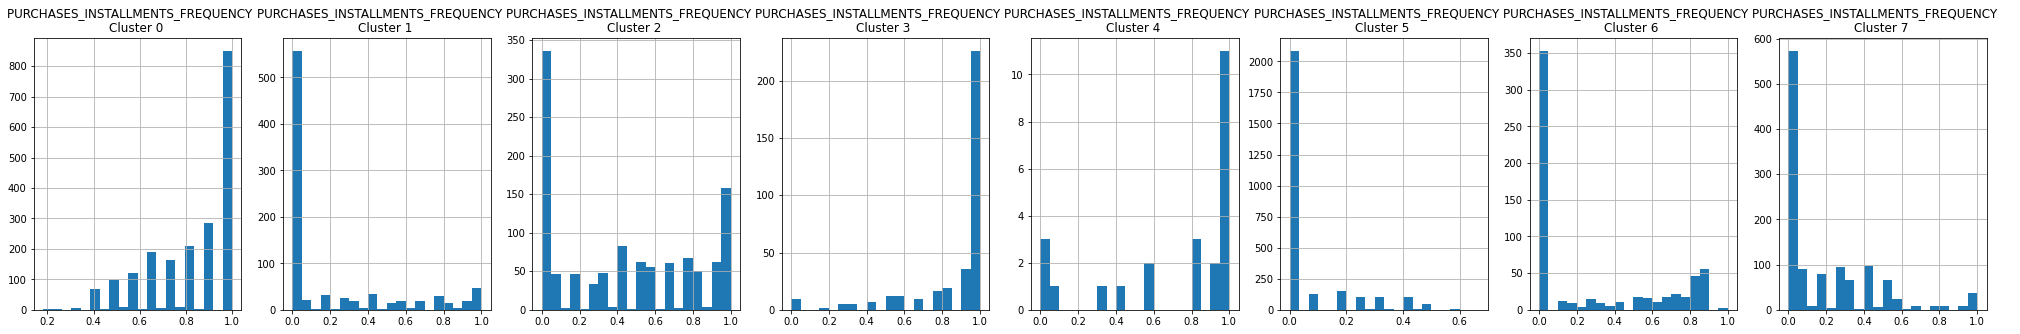

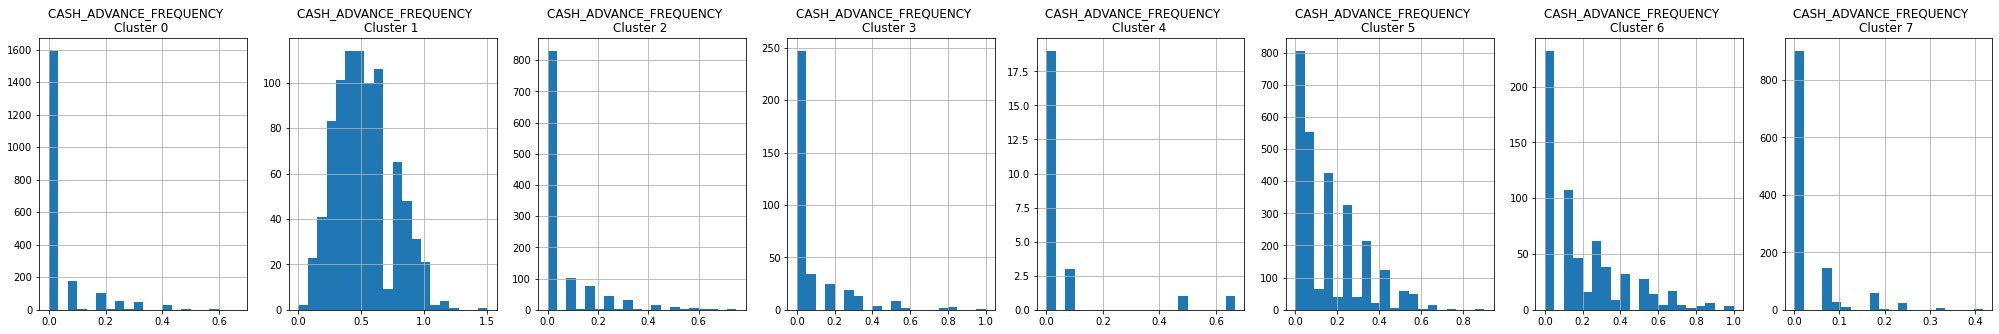

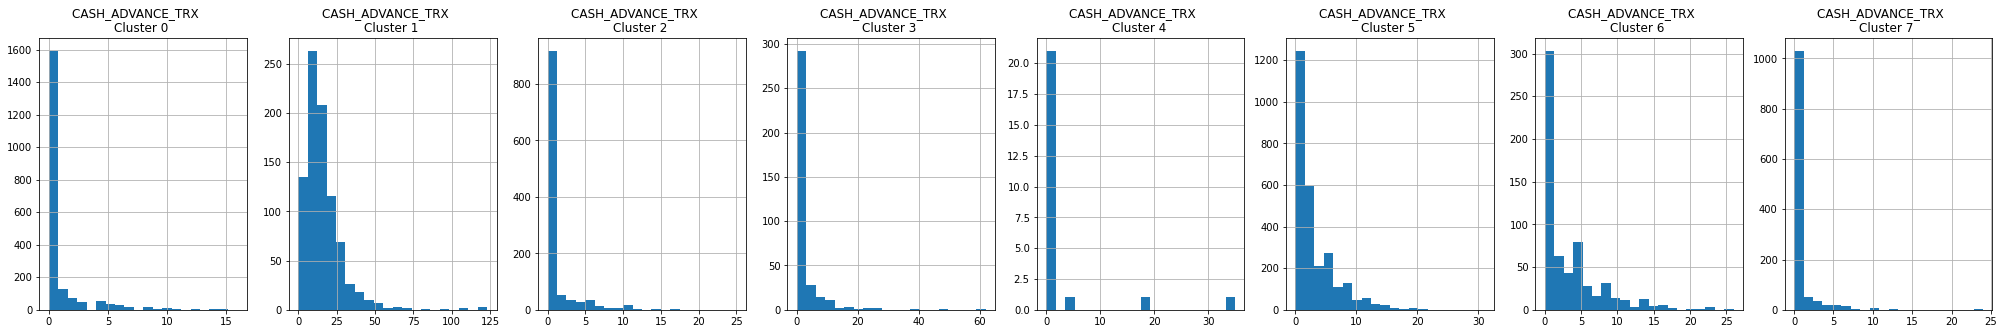

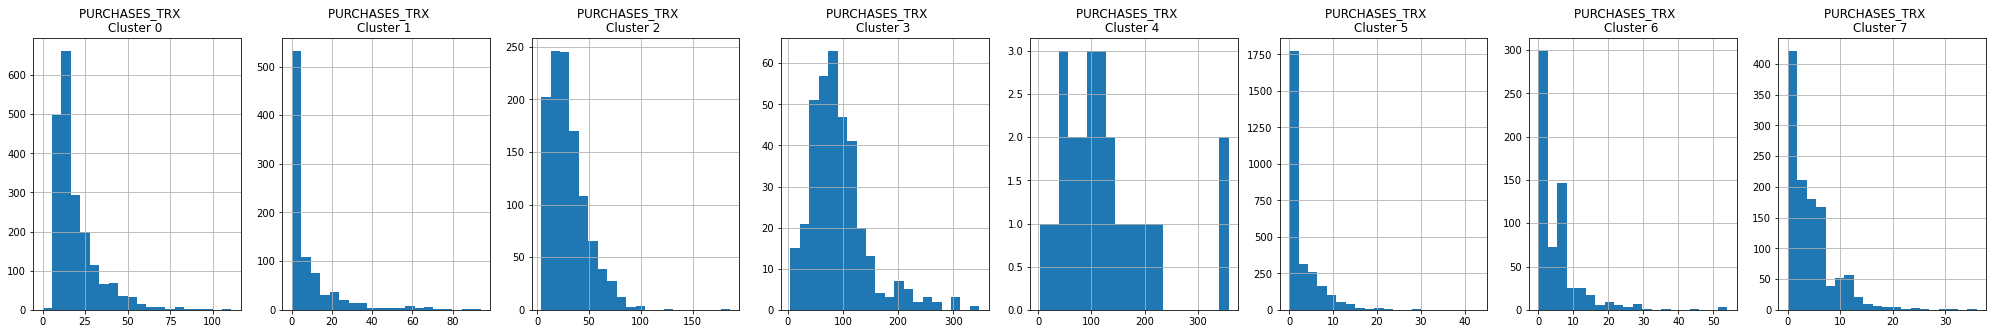

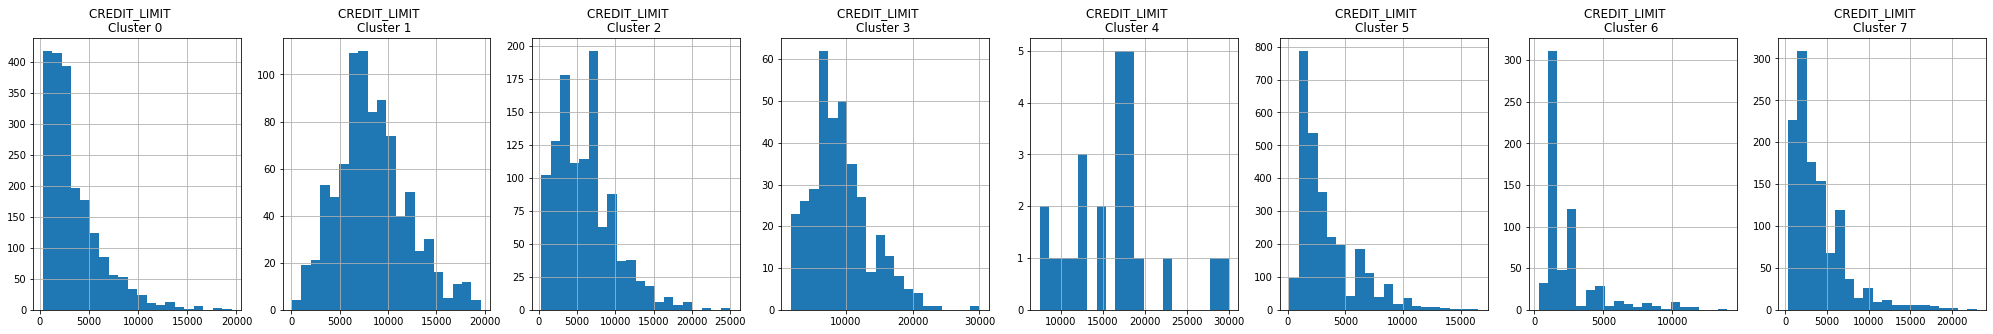

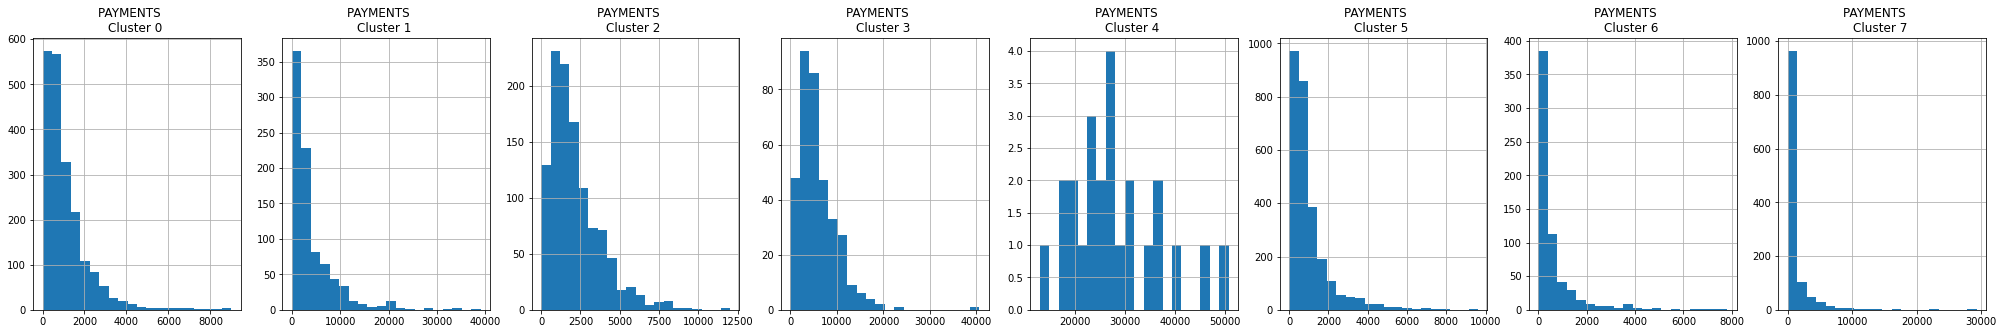

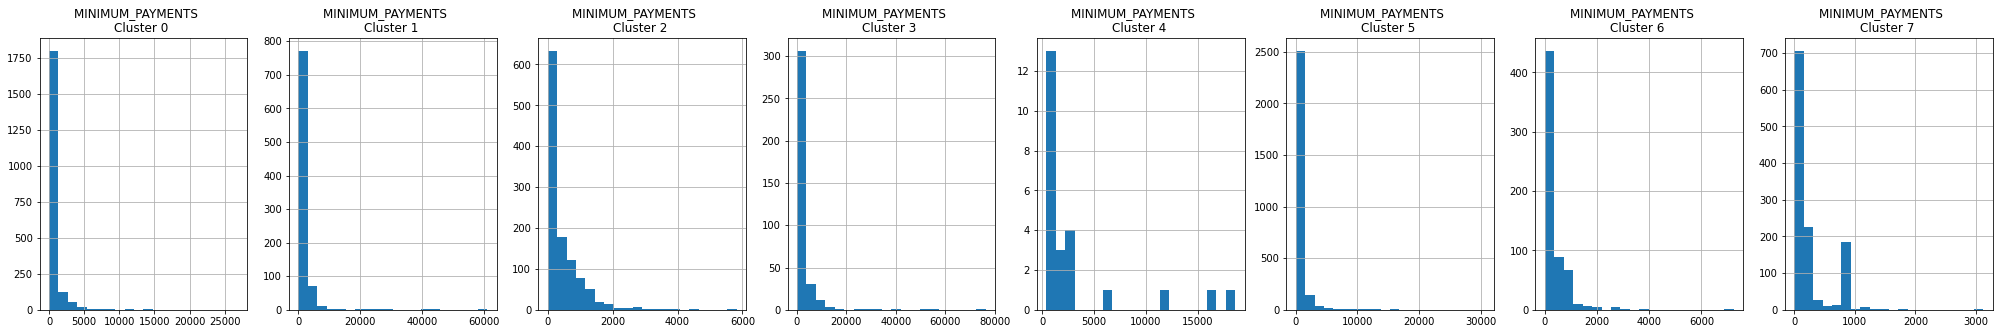

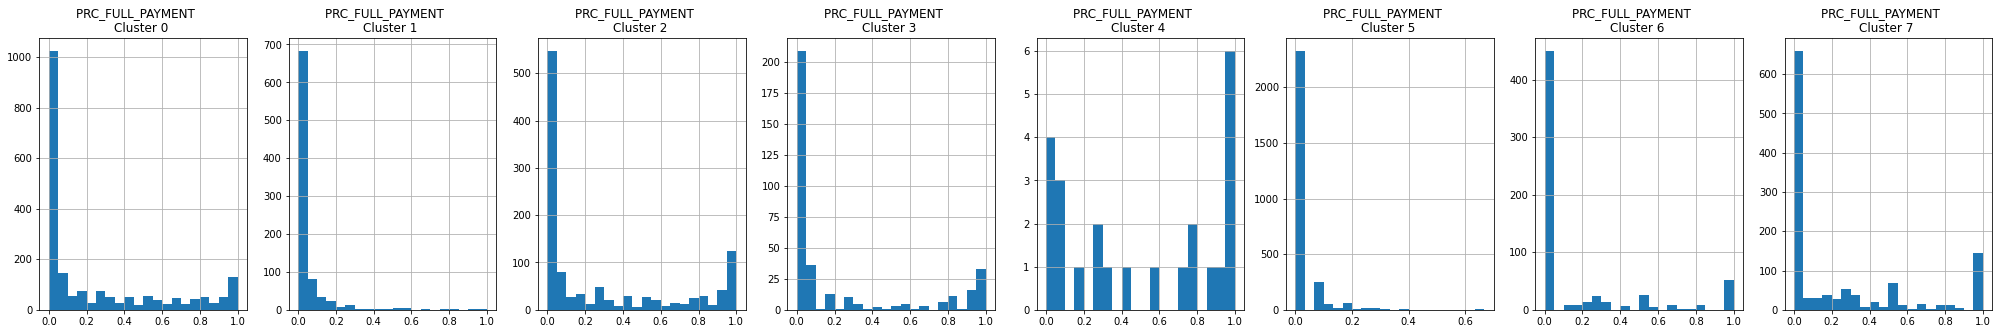

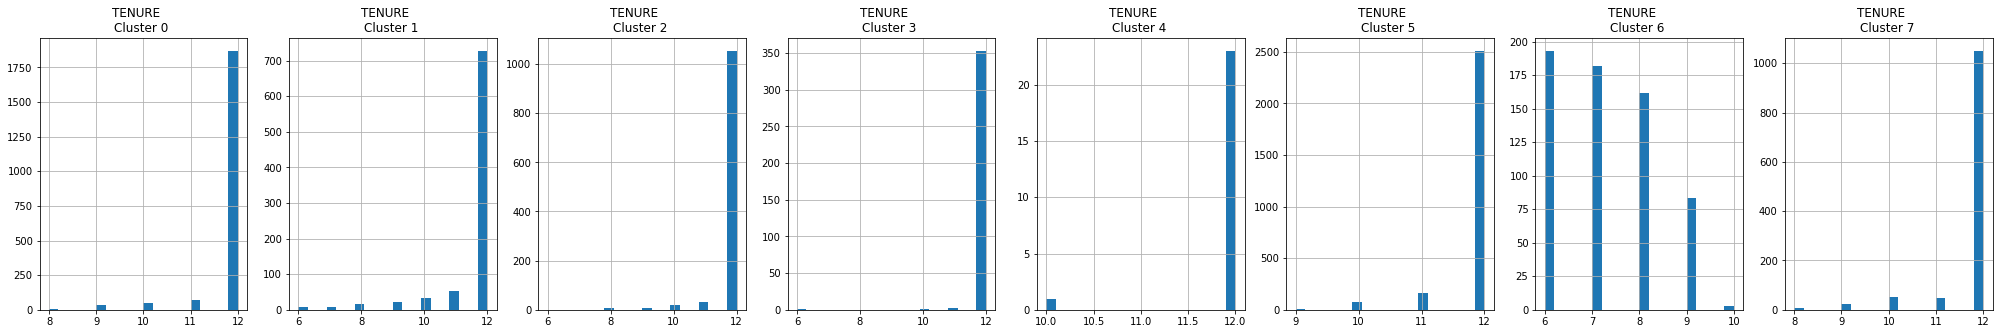

In [43]:
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [46]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221943, -1.07644867],
       [-1.13829611,  2.50648895],
       [ 0.96968045, -0.38353348],
       ...,
       [-0.92620208, -1.81078918],
       [-2.33654795, -0.65796219],
       [-0.55642273, -0.40046703]])

In [47]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.682219 -1.076449
1 -1.138296  2.506489
2  0.969680 -0.383533
3 -0.873627  0.043172
4 -1.599433 -0.688582

In [48]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.682219 -1.076449        5
1 -1.138296  2.506489        1
2  0.969680 -0.383533        2
3 -0.873627  0.043172        5
4 -1.599433 -0.688582        5

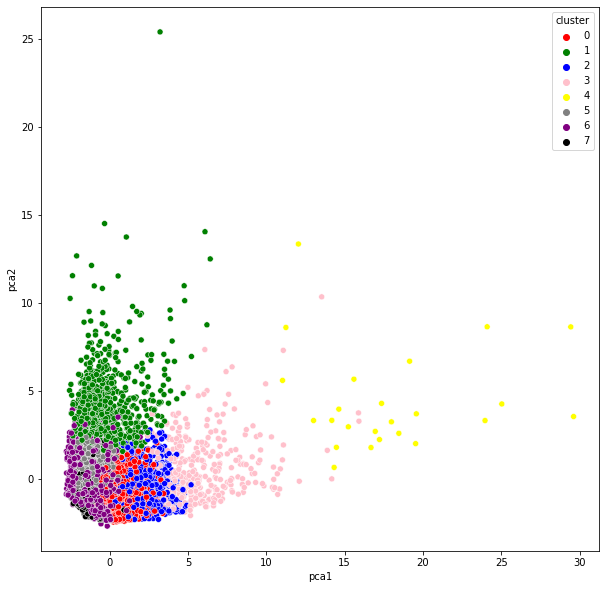

In [49]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

In [50]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))
x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [51]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 4s 52ms/step - loss: 0.5581
Epoch 2/25
70/70 [==============================] - 4s 51ms/step - loss: 0.3290
Epoch 3/25
70/70 [==============================] - 4s 51ms/step - loss: 0.2492
Epoch 4/25
70/70 [==============================] - 4s 52ms/step - loss: 0.2304
Epoch 5/25
70/70 [==============================] - 4s 51ms/step - loss: 0.2040
Epoch 6/25
70/70 [==============================] - 4s 52ms/step - loss: 0.2017
Epoch 7/25
70/70 [==============================] - 4s 51ms/step - loss: 0.1869
Epoch 8/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1784
Epoch 9/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1703
Epoch 10/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1704
Epoch 11/25
70/70 [==============================] - 4s 54ms/step - loss: 0.1666
Epoch 12/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1638
Epoch 13/25
70/70 [==================

In [53]:
autoencoder.save_weights('autoencoder.h5')

In [54]:
pred = encoder.predict(creditcard_df_scaled)

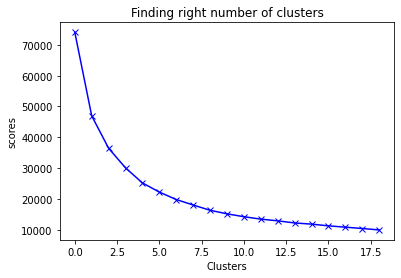

In [55]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

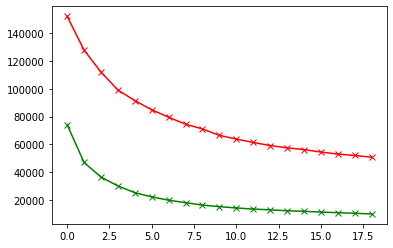

In [56]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

In [58]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [59]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ...  PRC_FULL_PAYMENT  TENURE  cluster
0    40.900749           0.818182      95.40  ...          0.000000      12        0
1  3202.467416           0.909091       0.00  ...          0.222222      12        3
2  2495.148862           1.000000     773.17  ...          0.000000      12        1
3  1666.670542           0.636364    1499.00  ...          0.000000      12        0
4   817.714335           1.000000      16.00  ...          0.000000      12        0

[5 rows x 18 columns]

In [60]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.800420 -0.060366
1  0.643533  1.411072
2  0.814455 -0.634452
3 -0.847695 -0.152515
4 -1.701271  0.054580

In [61]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -1.800420 -0.060366        0
1  0.643533  1.411072        3
2  0.814455 -0.634452        1
3 -0.847695 -0.152515        0
4 -1.701271  0.054580        0

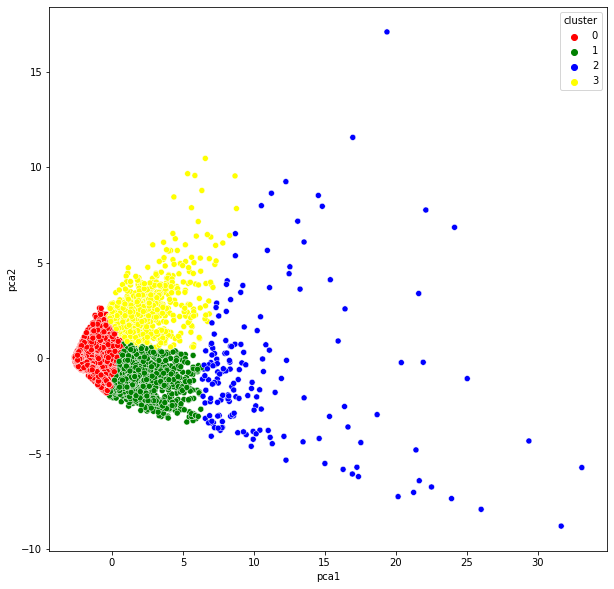

In [62]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()